<a href="https://colab.research.google.com/github/dmburns1729/Working-Files/blob/main/Multicollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the Data
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedPrice'] = housing.target

# Create the correlation matrix
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedPrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedPrice,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


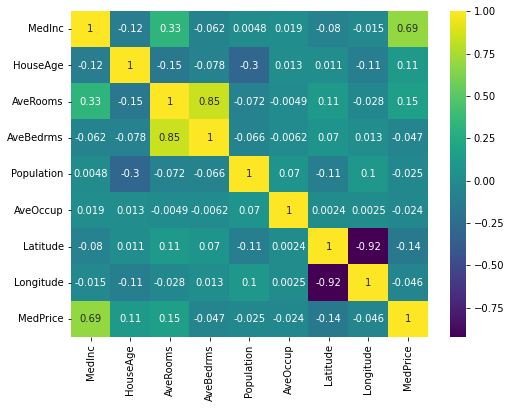

In [ ]:
from seaborn import heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

heatmap(df.corr(), cmap='viridis', annot=True);

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# isolate independent variables
features = df.drop('MedPrice', axis=1)

# demean the features
features = features - features.mean()

# create a new dataframe to hold the VIF scores
VIF = pd.DataFrame(index=features.columns)

# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

VIF['VIF'] = vif_scores
VIF

,VIF
MedInc,2.501295
HouseAge,1.241254
AveRooms,8.342786
AveBedrms,6.994995
Population,1.138125
AveOccup,1.008324
Latitude,9.297624
Longitude,8.962263


In [ ]:
# drop columns with high VIF
df_no_multiColl = df.drop(['AveBedrms', 'Longitude'], axis=1)

# drop target
new_features = df_no_multiColl.drop('MedPrice', axis=1)

# demean features
new_features = new_features - new_features.mean()

# create VIF dataframe
new_VIF = pd.DataFrame(index=new_features.columns)

new_vif_scores = [variance_inflation_factor(new_features.values, i) for i in range(len(new_features.columns))]

new_VIF['VIF'] = new_vif_scores

new_VIF

,VIF
MedInc,1.142944
HouseAge,1.141382
AveRooms,1.173163
Population,1.131275
AveOccup,1.006882
Latitude,1.037218


In [ ]:
df_combine = df.copy()

# combine features
df_combine['BedRoomRatio'] = df_combine['AveBedrms'] / df_combine['AveRooms']
df_combine['LatPlusLong'] = df_combine['Latitude'] + df_combine['Longitude']

# drop original features
df_combine.drop(columns=['AveBedrms','AveRooms','Latitude','Longitude'], inplace=True)
df_combine.head()

,MedInc,HouseAge,Population,AveOccup,MedPrice,BedRoomRatio,LatPlusLong
0,8.3252,41.0,322.0,2.555556,4.526,0.146591,-84.35
1,8.3014,21.0,2401.0,2.109842,3.585,0.155797,-84.36
2,7.2574,52.0,496.0,2.802260,3.521,0.129516,-84.39
3,5.6431,52.0,558.0,2.547945,3.413,0.184458,-84.40
4,3.8462,52.0,565.0,2.181467,3.422,0.172096,-84.40


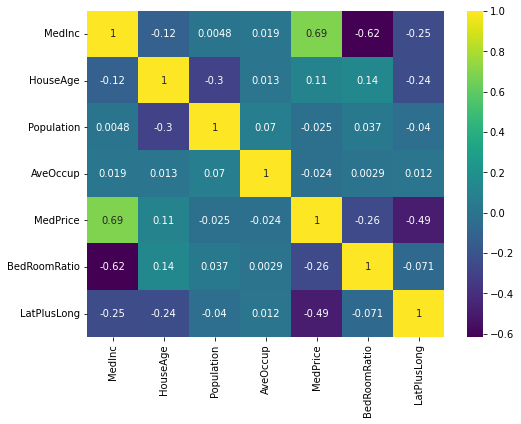

In [ ]:
plt.figure(figsize=(8,6))

heatmap(df_combine.corr(), annot=True, cmap='viridis')

In [ ]:
# drop target
combine_features = df_combine.drop('MedPrice', axis=1)

# demean features
combine_features = combine_features - combine_features.mean()

# create VIF dataframe
combine_VIF = pd.DataFrame(index=combine_features.columns)

combine_vif_scores = [variance_inflation_factor(combine_features.values, i) for i in range(len(combine_features.columns))]

combine_VIF['VIF'] = combine_vif_scores

combine_VIF

,VIF
MedInc,1.908221
HouseAge,1.228245
Population,1.126655
AveOccup,1.008289
BedRoomRatio,1.764330
LatPlusLong,1.271890


In [ ]:
# create a fruit dataframe
# create a fruit dataframe
fruit = [['banana'],['orange'],['apple'],['apple'],['orange'],['banana']]
fruit = pd.DataFrame(fruit)
fruit

,0
0,banana
1,orange
2,apple
3,apple
4,orange
5,banana


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# one-hot encode the fruit dataframe
ohe = OneHotEncoder(sparse=False)
onehot_fruit = ohe.fit_transform(fruit)
onehot_fruit = pd.DataFrame(onehot_fruit, columns=['apple','banana','orange'])
onehot_fruit

,apple,banana,orange
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0


In [ ]:
# fruit correlations
onehot_fruit.corr()

,apple,banana,orange
apple,1.0,-0.5,-0.5
banana,-0.5,1.0,-0.5
orange,-0.5,-0.5,1.0


In [ ]:
# demean onehot_fruit
onehot_fruit = onehot_fruit - onehot_fruit.mean()

# create the VIF dataframe
fruit_VIF = pd.DataFrame(index=onehot_fruit.columns)
fruit_vif_scores = [variance_inflation_factor(onehot_fruit.values, i) for i in range(len(onehot_fruit.columns))]
fruit_VIF['VIF'] = fruit_vif_scores

fruit_VIF

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
apple,inf
banana,inf
orange,inf


In [ ]:
# one-hot encode the fruit dataframe
ohe = OneHotEncoder(sparse=False, drop='first')
dummy_fruit = ohe.fit_transform(fruit)
dummy_fruit = pd.DataFrame(onehot_fruit, columns=['banana','orange'])
dummy_fruit

,banana,orange
0,0.666667,-0.333333
1,-0.333333,0.666667
2,-0.333333,-0.333333
3,-0.333333,-0.333333
4,-0.333333,0.666667
5,0.666667,-0.333333


In [ ]:
# dummy encode the fruit dataframe
ohe = OneHotEncoder(sparse=False, drop='first')
dummy_fruit = ohe.fit_transform(fruit)
dummy_fruit = pd.DataFrame(onehot_fruit, columns=['banana','orange'])
dummy_fruit

,banana,orange
0,0.666667,-0.333333
1,-0.333333,0.666667
2,-0.333333,-0.333333
3,-0.333333,-0.333333
4,-0.333333,0.666667
5,0.666667,-0.333333


In [ ]:
# demean dummy_fruit
dummy_fruit = dummy_fruit - dummy_fruit.mean()

# create the VIF dataframe
fruit_VIF = pd.DataFrame(index=dummy_fruit.columns)
fruit_vif_scores = [variance_inflation_factor(dummy_fruit.values, i) for i in range(len(dummy_fruit.columns))]
fruit_VIF['VIF'] = fruit_vif_scores

fruit_VIF

,VIF
banana,1.333333
orange,1.333333
